<h1 style="background-color:Green"></h1>

# Titanic Survival Prediction

* This project contains Dataset of titanic passengers who survived the accident
* Contains,Data Loading,Data cleaning,EDA,Data preproccesing,Classification model,cross-validation,model evaluation
* Built Classification Model to predict chance of passenger survival

## Data Loading

In [35]:
import pandas as pd
import numpy as np


In [36]:
df=pd.read_csv(r"C:\Users\bmsha\Downloads\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [39]:
df.duplicated().sum()

0

<h1 style="background-color:green"></h1>

## Data Cleaning

In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
perc=df.isna().sum()/len(df)*100
perc

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

> 77% of Cabin has null value,its Better to ignore the feature while model building,For cleaing filliing Age wit medain value,embarked with most frequent value 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

### Heat Map of NULL Values 

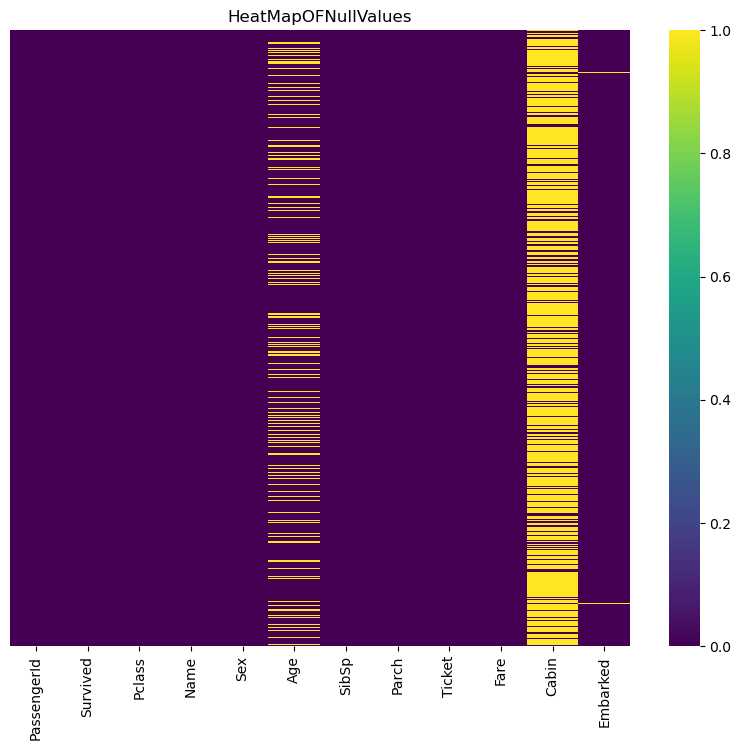

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)
plt.title('HeatMapOFNullValues')
plt.show()

In [44]:
data=df.drop(columns='Cabin')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [46]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [47]:
data['Embarked']=data['Embarked'].fillna('S')

In [48]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Heatmap Of NULL values After Cleaning

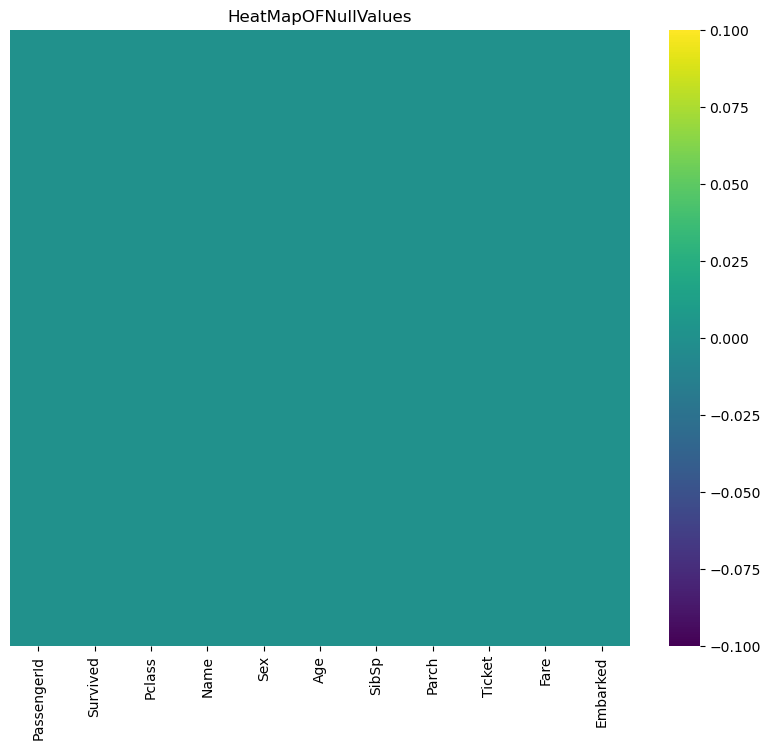

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)
plt.title('HeatMapOFNullValues')
plt.show()

<h1 style="background-color:green"></h1>

# EDA

### Correlation Heatmap

<Axes: >

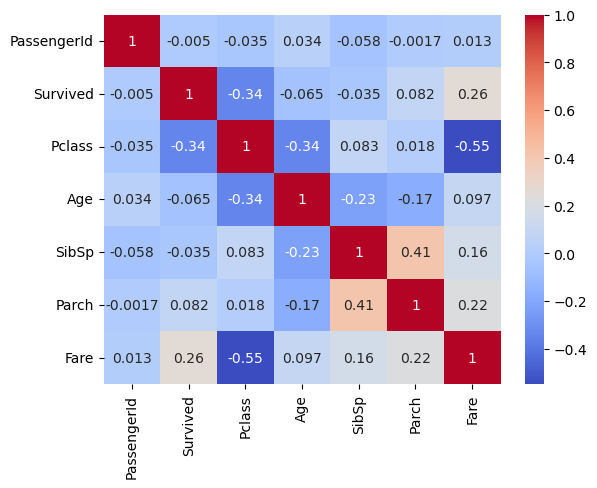

In [50]:
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm',annot=True)

> Analysis of the Titanic dataset shows that Fare has the strongest correlation with Survived, indicating that passengers who paid higher fares were more likely to survive, likely reflecting socio-economic advantages such as better cabins and lifeboat access. In contrast, Fare and Pclass exhibit a weak correlation, suggesting that fare alone does not strictly determine passenger class due to overlapping ticket prices and outliers. Similarly, Pclass and Survived show only a modest correlation, implying that class alone is not a strong predictor of survival and that other factors such as gender, and location on the ship play significant roles. Overall, while Fare is a useful predictor individually, combining multiple features is necessary to accurately model survival outcomes.

## relation b/w Features and Survival chance

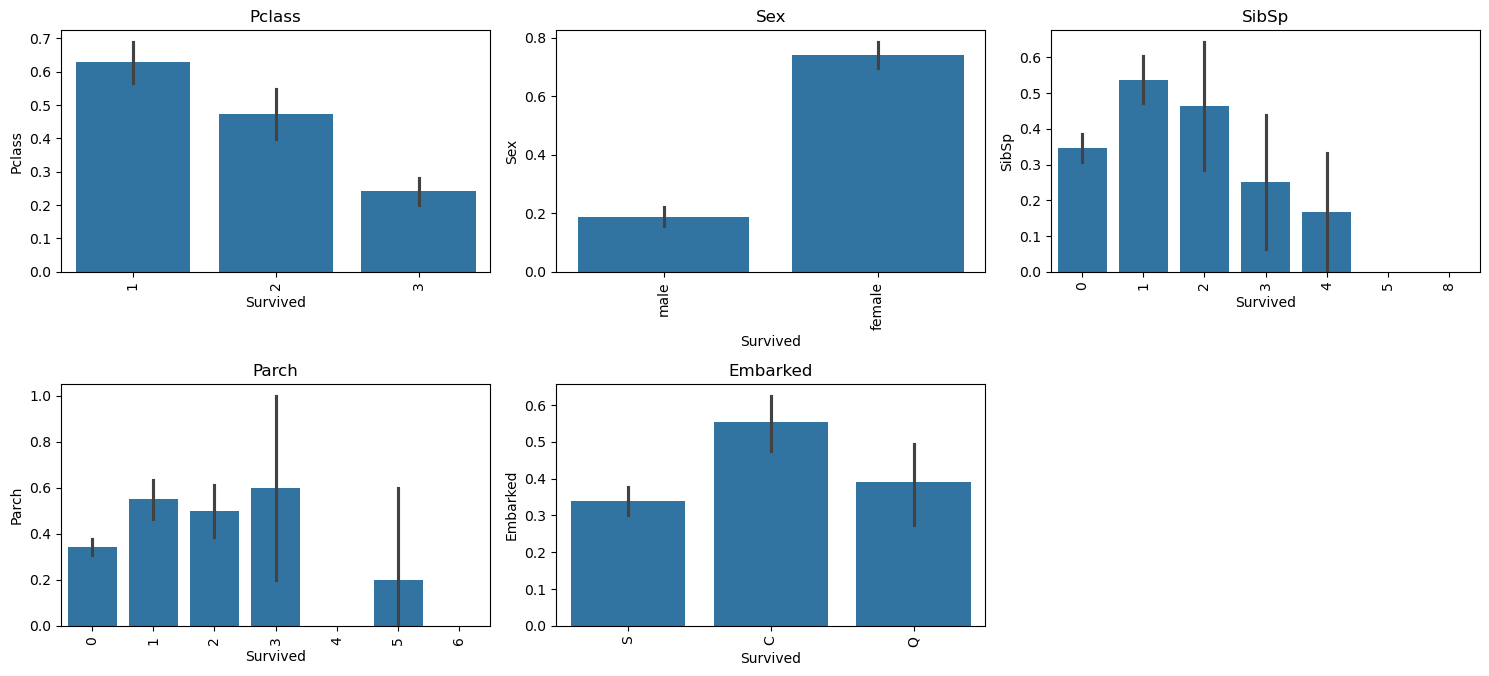

In [51]:
fet=['Pclass','Sex','SibSp','Parch','Embarked']
plt.figure(figsize=(15,10))  

for i, par in enumerate(fet, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=data,x=par,y='Survived')
    plt.title(par)
    plt.xlabel('Survived')
    plt.ylabel(par)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

 >Analysis of the Titanic dataset shows that passengers who paid higher fares, were 1st class, female, or boarded from Cherbourg had the highest survival rates, highlighting the influence of socio-economic status, gender, and boarding location. In contrast, passengers with siblings/spouses aboard (SibSp > 0) or more parents/children aboard (Parch > 1) had lower survival rates, suggesting that larger family groups faced greater challenges during evacuation. Overall, survival depended on a combination of fare, class, gender, boarding port, and family size, rather than any single feature alone.

### Age and Survival Analysis

In [52]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_group)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

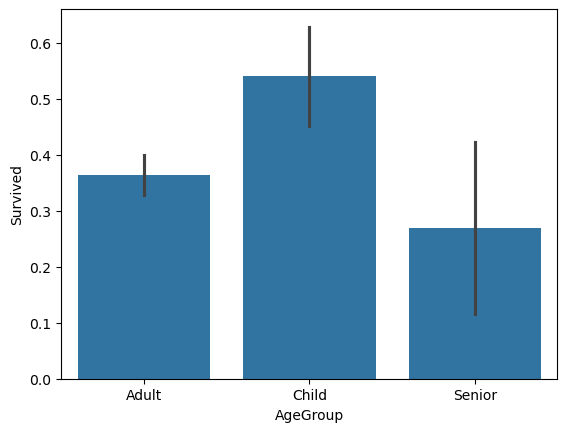

In [53]:
sns.barplot(data,x='AgeGroup',y='Survived')

> Categorizing by age in the Titanic dataset, children (<18) had the highest survival rates, adults (<60) had moderate survival, and seniors (≥60) had the lowest survival, indicating that age was an important factor influencing survival outcomes.

<h1 style="background-color:green"></h1>

# Data Preproccessing

In [54]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


> Encoding Sex,Embaked Coloumns Using Labelencoding method

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data.Sex)
for label,i in enumerate(le.classes_):
    print(f"{label}:{i}")

0:female
1:male


In [58]:
data.Embarked=le.fit_transform(data.Embarked)
for label,i in enumerate(le.classes_):
    print(f"{label}:{i}")

0:C
1:Q
2:S


In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2,Adult
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,Adult


<h1 style="background-color:green"></h1>

# Model Building,Cross Validation & Evaluation

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [61]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [62]:
numeric_feture=['Pclass','Sex','Age','Fare','SibSp','Embarked','Parch']
x=data[numeric_feture]
y=data['Survived']
model=RandomForestClassifier(n_estimators=500,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=42)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       436
           1       0.74      0.67      0.70       277

    accuracy                           0.78       713
   macro avg       0.77      0.76      0.76       713
weighted avg       0.78      0.78      0.78       713



> The model is better at predicting non-survivors than survivors.
 Recall for survivors (0.67) is lower → some survivors are misclassified as non-survivors.

In [63]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred2=lr.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       436
           1       0.79      0.66      0.72       277

    accuracy                           0.80       713
   macro avg       0.80      0.77      0.78       713
weighted avg       0.80      0.80      0.80       713



> The model is still stronger at predicting non-survivors than survivors.
 Recall for survivors is lower (0.66) Overall, the model shows good predictive ability (80% accuracy) and improved over the previous version.

In [64]:
sample=xtest.iloc[0:1]
sample

,Pclass,Sex,Age,Fare,SibSp,Embarked,Parch
709,3,1,28.0,15.2458,1,0,1


In [65]:
model.predict(sample)

array([0], dtype=int64)

In [66]:
lr.predict(sample)

array([0], dtype=int64)

In [67]:
pred=[[1,0,13,15.3,0,1,3]]
model.predict(pred)

array([1], dtype=int64)

In [68]:
lr.predict(pred)

array([1], dtype=int64)

<h3 style="back>The RandomForestClassifier achieved 78% accuracy, performing well for non-survivors (precision 0.80, recall 0.85, F1 0.82) but weaker for survivors (precision 0.74, recall 0.67, F1 0.70), showing a slight bias toward predicting non-survivors. LogisticRegression performed slightly better with 80% accuracy, higher macro and weighted averages, and stronger non-survivor recall (0.89) while maintaining similar survivor recall (0.66). Overall, LogisticRegression offers a more balanced and accurate model, though both still underperform in identifying survivors compared to non-survivors.

<h3 style="background-color:cyan">The RandomForestClassifier achieved 78% accuracy, performing well for non-survivors (precision 0.80, recall 0.85, F1 0.82) but weaker for survivors (precision 0.74, recall 0.67, F1 0.70), showing a slight bias toward predicting non-survivors. LogisticRegression performed slightly better with 80% accuracy, higher macro and weighted averages, and stronger non-survivor recall (0.89) while maintaining similar survivor recall (0.66). Overall, LogisticRegression offers a more balanced and accurate model, though both still underperform in identifying survivors compared to non-survivors.</h3>

[]

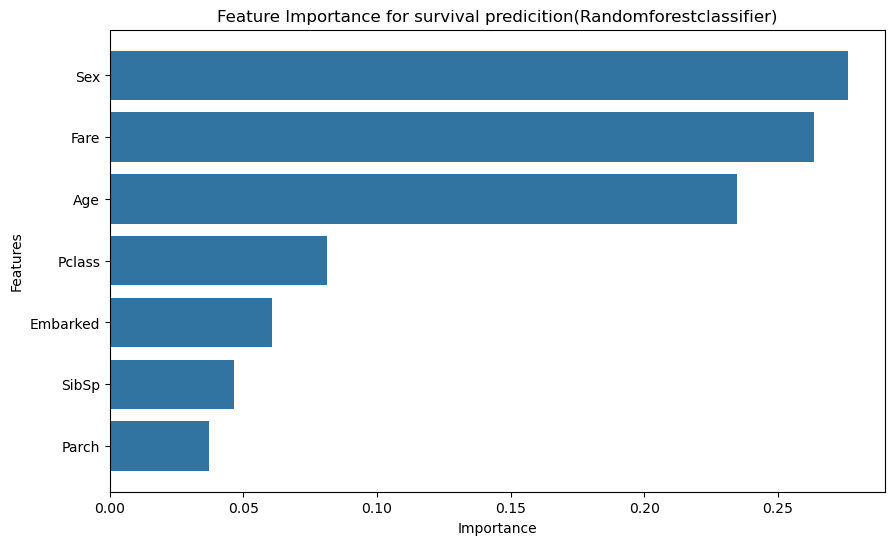

In [69]:
fetimpo=pd.DataFrame({ 'Features':numeric_feture ,'Importance':model.feature_importances_ })
fetimpo=fetimpo.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for survival predicition(Randomforestclassifier)')
plt.plot()

[]

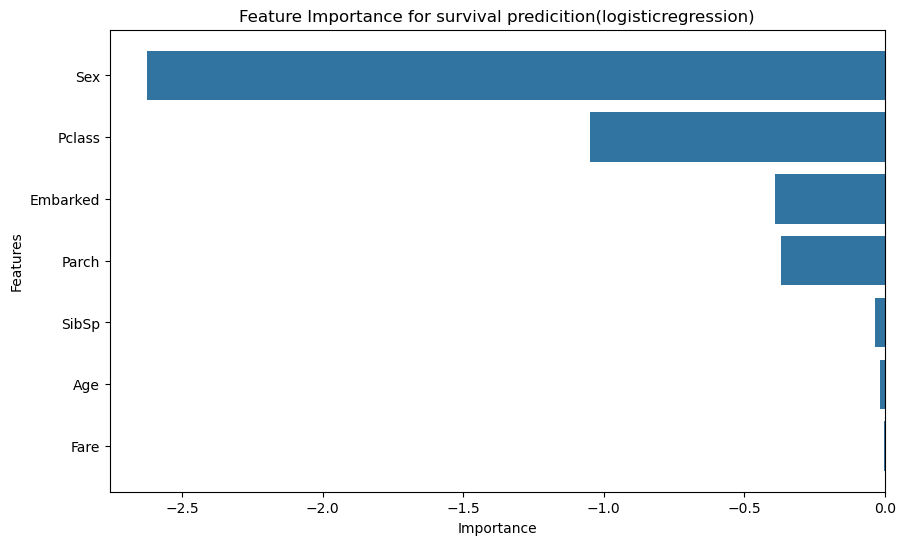

In [72]:
fetimpo=pd.DataFrame({ 'Features':numeric_feture ,'Importance':lr.coef_[0] })
fetimpo = fetimpo.reindex(fetimpo.Importance.abs().sort_values(ascending=False).index)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for survival predicition(logisticregression)')
plt.plot()

> Both models important feature is Sex

# Conclusion
<h3 style="background-color:cyan">The Titanic survival prediction project demonstrates how different machine learning models perform on imbalanced real-world data. Exploratory analysis revealed that survival was strongly influenced by socio-demographic and travel-related factors—females, children, first-class passengers, and those embarked from Cherbourg had higher survival rates, while males, seniors, and those with more family aboard had lower survival chances. Feature engineering (like grouping age into child/adult/senior) improved interpretability. Among models tested, Logistic Regression (80% accuracy) slightly outperformed RandomForest (78% accuracy), offering better balance across classes, though both still struggled with correctly identifying survivors compared to non-survivors. Feature importance analysis highlighted sex, class, and fare as the most decisive predictors. Overall, the project shows the value of combining data analysis with classification models to uncover historical survival patterns and evaluate predictive accuracy.</h3>

<h1 style="background-color:green"></h1>